In [1]:
# Create an empty list to store arrays from each file
data_list = []
import os
import numpy as np

print(os.getcwd())
# Specify the directory
directory = "/Users/blaubach/chimes_CGD-myLLFork/cluster_analysis/1.0gcc_2000K_3B_graphs/1.0gcc_2000K_3B_graphs/1.0gcc_2000k_3bR/"
# Set the desired subsample size
subsample_size = 1000
# Loop over the range of integers from 50 to 74
for i in range(75, 100):
    # Generate the filename
    filename = f'{directory}00{i}.3b_clu-r.txt'
    
    try:
        # Read the data from the file and append it to the list
        data = np.loadtxt(filename)
        sort_data = np.sort(data, axis=1)

        # Subsample the sorted data using random indices
        random_indices = np.random.choice(sort_data.shape[0], size=subsample_size, replace=False)
        subsampled_data = sort_data[random_indices, :]
        
        #data_list.append(sort_data) # Account for graph invariance
        data_list.append(subsampled_data)  # Account for graph invariance

    except FileNotFoundError:
        print(f"File not found: {filename}")

# Concatenate the list of arrays along axis 0 (rows)
concat_data = np.concatenate(data_list, axis=0)


# Print the shape of concatenated data
print("Shape:", np.shape(concat_data))
concat_data

/Users/blaubach/chimes_CGD-myLLFork/cluster_analysis/1.0gcc_2000K_3B_graphs
Shape: (25000, 3)


array([[2.09656, 3.69581, 4.04627],
       [2.17697, 4.46303, 4.7648 ],
       [4.11079, 4.17627, 4.45067],
       ...,
       [2.70887, 3.78242, 4.24883],
       [3.11878, 3.53158, 4.57332],
       [2.59427, 2.79754, 3.58096]])

/Users/blaubach/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


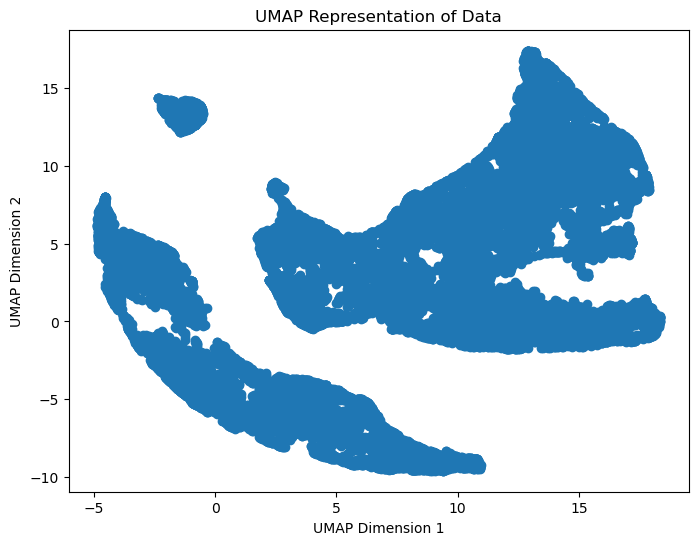

In [2]:
import numpy as np
import umap.umap_ as umap
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming your data matrix is called 'data' with size (n, 3)
# where n is the number of samples and 3 is the number of features.

# Create a UMAP model with 2 components (dimensions)
umap_model = umap.UMAP(random_state=42,n_components=2)

# Fit the UMAP model to your data and transform it to 2 dimensions
embedding = umap_model.fit_transform(concat_data)

# Calculate KDE
x = embedding[:,0]
y = embedding[:,1]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
first, second, z = x[idx], y[idx], z[idx]

# Plot the embedded data with colors and shapes based on labels
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
#plt.scatter(first, second, c=z)
plt.scatter(first, second)
# Plot the locations of the text points
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('UMAP Representation of Data')
plt.show()


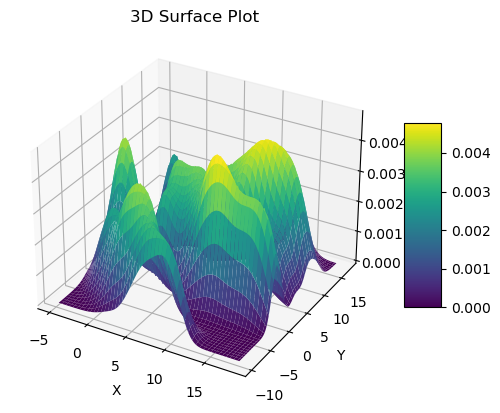

In [3]:
# Create a grid for the surface plot
x_grid, y_grid = np.meshgrid(np.linspace(min(x), max(x), 100), np.linspace(min(y), max(y), 100))
xy_grid = np.vstack([x_grid.ravel(), y_grid.ravel()])
z_grid = gaussian_kde(xy)(xy_grid).reshape(x_grid.shape)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(x_grid, y_grid, z_grid, cmap='viridis', edgecolor='none')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Surface Plot')

# Add a color bar
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


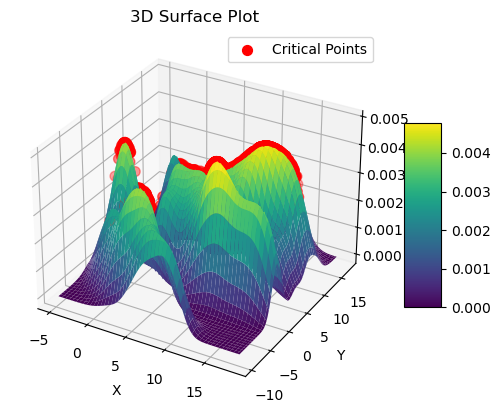

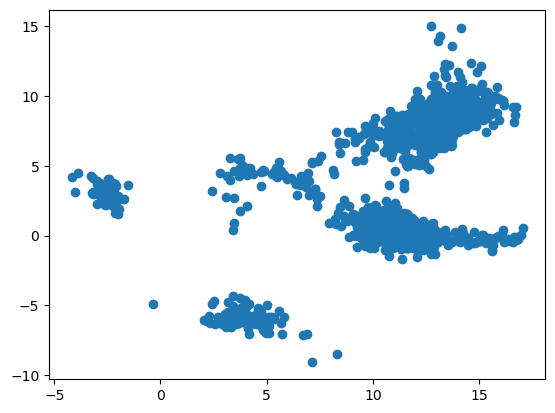

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import gaussian_kde
from scipy.signal import find_peaks

# Assuming embedding is your data
x = embedding[:, 0]
y = embedding[:, 1]
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)

# Find local maxima in z with a minimum prominence
peaks, _ = find_peaks(z, distance=10, height=0.5*z.max())  # Adjust the prominence threshold as needed

# Extract critical points
critical_points_x = x[peaks]
critical_points_y = y[peaks]
critical_points_z = z[peaks]

# Create a grid for the surface plot
x_grid, y_grid = np.meshgrid(np.linspace(min(x), max(x), 100), np.linspace(min(y), max(y), 100))
xy_grid = np.vstack([x_grid.ravel(), y_grid.ravel()])
z_grid = gaussian_kde(xy)(xy_grid).reshape(x_grid.shape)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(x_grid, y_grid, z_grid, cmap='viridis', edgecolor='none')

# Plot critical points as red points
ax.scatter(critical_points_x, critical_points_y, critical_points_z, color='red', s=50, label='Critical Points')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Surface Plot')

# Add a color bar
fig.colorbar(surf, shrink=0.5, aspect=5)

# Add legend
ax.legend()

plt.show()
plt.scatter(critical_points_x,critical_points_y)
plt.show()


Centroid 0: Label 0 - Coordinates: [11.341856    0.27662316]
Centroid 1: Label 1 - Coordinates: [12.947082  8.119003]
Centroid 2: Label 2 - Coordinates: [-2.5115838  3.0705593]
Centroid 3: Label 3 - Coordinates: [ 4.017315  -5.8673344]
Centroid 4: Label 4 - Coordinates: [5.501437 4.30848 ]


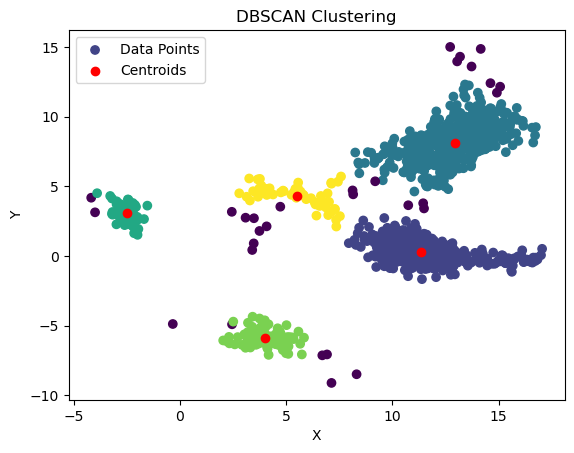

In [15]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

# Assuming x and y are your data
X = np.column_stack((critical_points_x, critical_points_y))  # Stack x and y to form the input data matrix

db = DBSCAN(eps=0.75, min_samples=5).fit(X)
labels = db.labels_

# Get centroids (the geometric mean of all points in a cluster)
centroids = []
centroid_labels = []
unique_labels = set(labels)
for label in unique_labels:
    if label != -1:  # Exclude noise points (-1)
        cluster_points = X[labels == label]
        centroid = np.mean(cluster_points, axis=0)
        centroids.append(centroid)
        centroid_labels.append(label)

centroids = np.array(centroids)

# Print centroids and their labels
for i, centroid in enumerate(centroids):
    print(f"Centroid {i}: Label {centroid_labels[i]} - Coordinates: {centroid}")

# Plot data points
plt.scatter(critical_points_x, critical_points_y, c=labels, cmap='viridis', label='Data Points')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='o', label='Centroids')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('DBSCAN Clustering')
plt.legend()
plt.show()

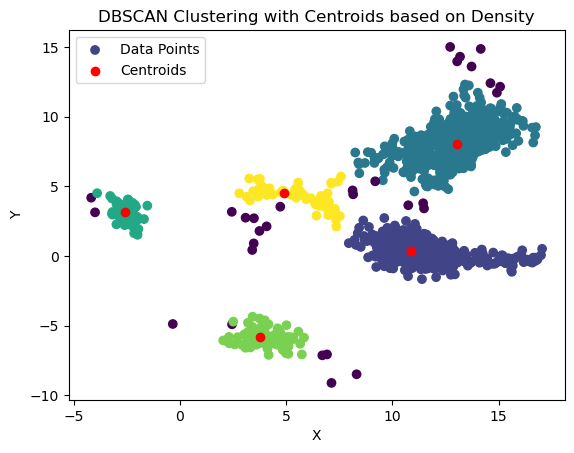

In [16]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KernelDensity

# Calculate density estimation
kde = KernelDensity(bandwidth=0.5).fit(X)
densities = kde.score_samples(X)
N = 5
# Get highest density points for each cluster
highest_density_points = []
for label in unique_labels:
    if label != -1:  # Exclude noise points (-1)
        cluster_points = X[labels == label]
        cluster_densities = densities[labels == label]
        sorted_indices = np.argsort(cluster_densities)[::-1]  # Sort in descending order
        highest_density_points.append(cluster_points[sorted_indices][:N])  # Select top N points

# Calculate centroids based on highest density points
centroids = np.array([np.mean(cluster, axis=0) for cluster in highest_density_points])

# Plot data points
plt.scatter(critical_points_x, critical_points_y, c=labels, cmap='viridis', label='Data Points')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='o', label='Centroids')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('DBSCAN Clustering with Centroids based on Density')
plt.legend()
plt.show()



[[2.571058  3.8065448 4.4788594]
 [3.7216003 4.05581   4.7409124]
 [1.2646658 2.469633  3.661423 ]
 [1.4969972 3.742036  4.5590215]
 [2.6081243 3.1516707 3.792267 ]]
Number of Clusters:  5
2.571058 3.8065448 4.4788594
3.7216003 4.05581 4.7409124
1.2646658 2.469633 3.661423
1.4969972 3.742036 4.5590215
2.6081243 3.1516707 3.792267


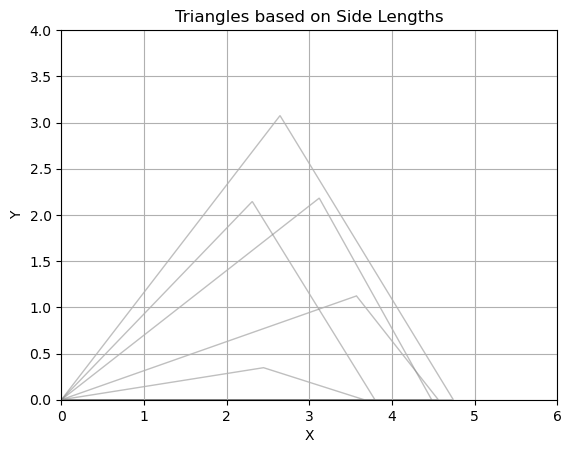

In [18]:
from matplotlib.patches import Polygon

def coordinates_of_triangle_given_SSS(a, b, c):
    """a, b and c are lengths of the sides of a triangle"""

    A = (0, 0) # coordinates of vertex A

    B = (c, 0) # coordinates of vertex B

    C_x = b * float(b**2 + c**2 - a**2) / (2 * b * c)
    C_y = float(np.sqrt(b**2 - C_x**2)) # square root

    C = (float(C_x), float(C_y)) # coordinates of vertex C

    vertices = np.array([A,B,C])
    return vertices

fig, ax = plt.subplots()

inv_transformed_points = umap_model.inverse_transform(centroids)
print(inv_transformed_points)

print("Number of Clusters: ", len(inv_transformed_points))

for row in inv_transformed_points:
    a, b, c = row
    print(a,b,c)
    coords = coordinates_of_triangle_given_SSS(a, b, c)
    edge_color = (0.5, 0.5, 0.5, 0.5)  # RGBA tuple for transparent grey
    p = Polygon(coords, edgecolor=edge_color, facecolor='none')
    ax.add_patch(p)

# Set plot limits
plt.xlim(0, 15)
plt.ylim(0, 15)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Triangles based on Side Lengths')

plt.grid(True)
plt.xlim(0,6)
plt.ylim(0,4)
plt.show()

[[2.571058  3.8065448 4.4788594]
 [3.7216003 4.05581   4.7409124]
 [1.2646658 2.469633  3.661423 ]
 [1.4969972 3.742036  4.5590215]
 [2.6081243 3.1516707 3.792267 ]]
Number of Clusters:  5
2.571058 3.8065448 4.4788594


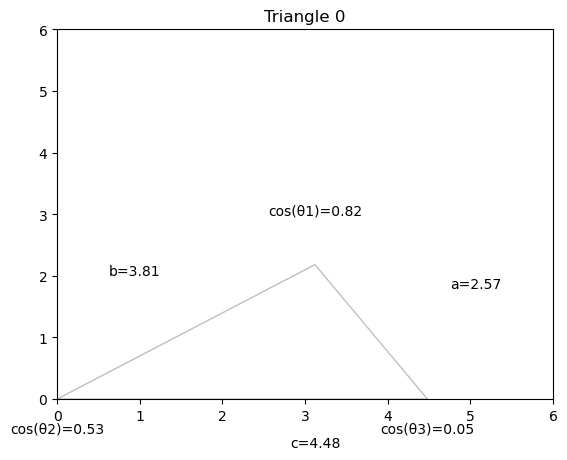

3.7216003 4.05581 4.7409124


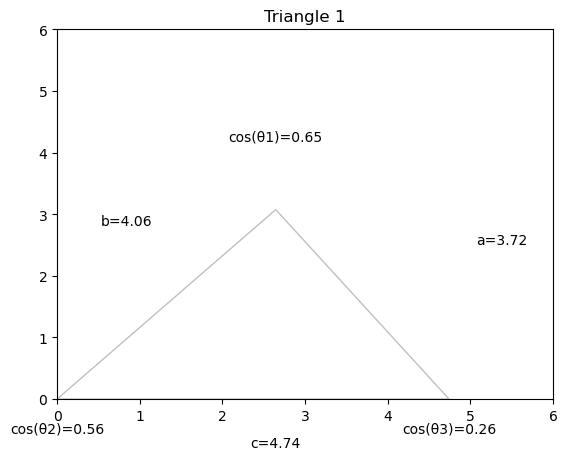

1.2646658 2.469633 3.661423


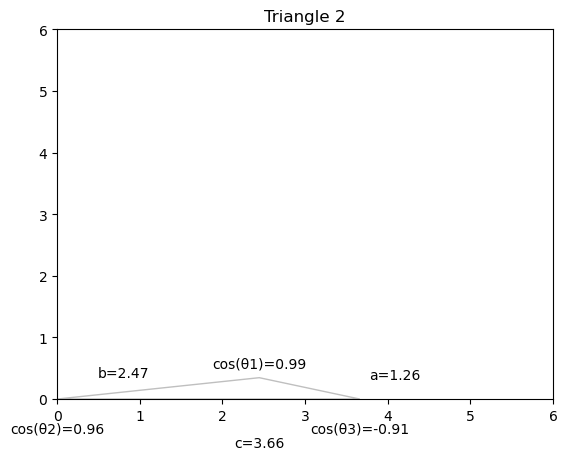

1.4969972 3.742036 4.5590215


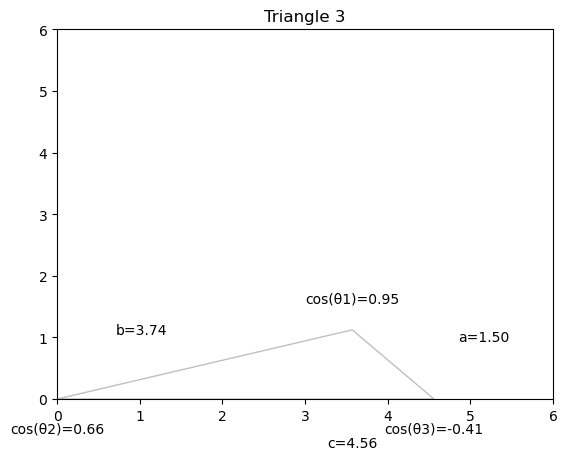

2.6081243 3.1516707 3.792267


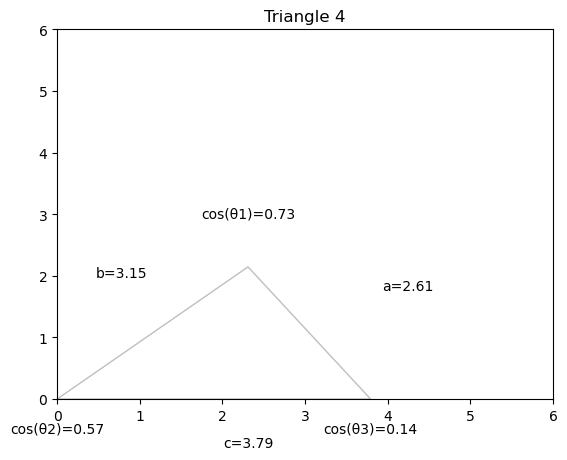

In [19]:
from matplotlib.patches import Polygon

def coordinates_of_triangle_given_SSS(a, b, c):
    """a, b and c are lengths of the sides of a triangle"""

    A = (0, 0) # coordinates of vertex A

    B = (c, 0) # coordinates of vertex B

    C_x = b * float(b**2 + c**2 - a**2) / (2 * b * c)
    C_y = float(np.sqrt(b**2 - C_x**2)) # square root

    C = (float(C_x), float(C_y)) # coordinates of vertex C

    vertices = np.array([A,B,C])
    return vertices

cnt = 0
inv_transformed_points = umap_model.inverse_transform(centroids)
print(inv_transformed_points)

print("Number of Clusters: ", len(inv_transformed_points))

for row in inv_transformed_points:
    fig, ax = plt.subplots()
    a, b, c = row
    print(a,b,c)
    coords = coordinates_of_triangle_given_SSS(a, b, c)
    edge_color = (0.5, 0.5, 0.5, 0.5)  # RGBA tuple for transparent grey
    p = Polygon(coords, edgecolor=edge_color, facecolor='none')
    ax.add_patch(p)
    cos_A = (b**2+c**2-a**2)/(2*b*c)
    cos_B = (a**2+c**2-b**2)/(2*a*c)
    cos_C = (a**2+b**2-c**2)/(2*a*b)

    # Annotate the triangle with side lengths and angles
    ax.text(1.2*coords[1][0], 0.8*coords[2][1], f'a={a:.2f}', ha='right', va='bottom')
    ax.text(0.2*coords[2][0], 0.9*coords[2][1], f'b={b:.2f}', ha='left', va='bottom')
    ax.text(coords[2][0], -0.6, f'c={c:.2f}', ha='center', va='top')
    ax.text(coords[2][0], coords[2][1]*1.35, f'cos(θ1)={cos_A:.2f}', ha='center', va='bottom') # Good location
    ax.text(coords[0][0]*1.5, coords[0][1]-0.6, f'cos(θ2)={cos_B:.2f}', ha='center', va='bottom')
    ax.text(coords[1][0], coords[1][1]-0.6, f'cos(θ3)={cos_C:.2f}', ha='center', va='bottom')

    plt.title(f'Triangle {cnt}')

    plt.xlim(0,6)
    plt.ylim(0,6)
    plt.show()
    cnt+=1


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import seaborn as sns

def calculate_angle(a, b, c):
    """Calculate the angles of a triangle given its side lengths."""
    try:
        cos_A = (b**2+c**2-a**2)/(2*b*c)
        cos_B = (a**2+c**2-b**2)/(2*a*c)
        cos_C = (a**2+b**2-c**2)/(2*a*b)
        # degree_A = np.arccos(cos_A)*180/np.pi
        # sin_A = np.sin(degree_A*np.pi/180)
        # sin_B = sin_A*b/a
        # degree_B = np.arcsin(sin_B)*180/np.pi
        # degree_C = 180 - degree_A - degree_B
        # return degree_A, degree_B, degree_C
        return cos_A, cos_B, cos_C
    except RuntimeWarning as warning:
        print("RuntimeWarning occurred. Values:", a, b, c)
        return np.nan, np.nan, np.nan

def coordinates_of_triangle_given_SSS(a, b, c):
    """Calculate the coordinates of the vertices of a triangle given its side lengths."""
    A = (0, 0) # coordinates of vertex A
    B = (c, 0) # coordinates of vertex B
    C_x = b * float(b**2 + c**2 - a**2) / (2 * b * c)
    C_y = float(np.sqrt(b**2 - C_x**2)) # square root
    C = (float(C_x), float(C_y)) # coordinates of vertex C
    vertices = np.array([A, B, C])
    return vertices

def plot_triangles(ax, inv_transformed_points):
    """Plot triangles on the given axis."""
    for row in inv_transformed_points:
        a, b, c = row
        coords = coordinates_of_triangle_given_SSS(a, b, c)
        edge_color = (0.5, 0.5, 0.5, 0.5)  # RGBA tuple for transparent grey
        p = Polygon(coords, edgecolor=edge_color, facecolor='none')
        ax.add_patch(p)

def plot_histograms(ax, data, labels):
    """Plot histograms for given data with corresponding labels."""
    for i, (side, label) in enumerate(zip(data, labels)):
        sns.histplot(side, kde=True, color='blue', ax=ax[i])

        mean_side = np.mean(side)
        std_side = np.std(side)
        ax[i].axvline(mean_side, color='red', linestyle='--', label=f'Mean: {mean_side:.2f}')
        ax[i].axvline(mean_side + std_side, color='green', linestyle='--', label=f'Std Dev: {std_side:.2f}')
        ax[i].axvline(mean_side - std_side, color='green', linestyle='--')
        ax[i].text(1.1, 0.8, f'Mean: {mean_side:.2f}', color='red', transform=ax[i].transAxes)
        ax[i].text(1.1, 0.4, f'Std Dev: {std_side:.2f}', color='green', transform=ax[i].transAxes) 

        ax[i].set_xlabel(label)
        ax[i].set_ylabel('Frequency')

def main(inv_transformed_points, a_side_lengths, b_side_lengths, c_side_lengths, a_angle, b_angle, c_angle, label):
    fig, ax = plt.subplots()
    ax.set_xlim(0, 6)
    ax.set_ylim(0, 6)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(f'3B Graphs with group {label}')
    ax.grid(True)

    plot_triangles(ax, inv_transformed_points)
    plt.show()

    fig, axes = plt.subplots(3, 1, figsize=(8, 6))
    side_lengths = [a_side_lengths, b_side_lengths, c_side_lengths]
    side_labels = ['Side c', 'Side b', 'Side a']
    plot_histograms(axes, side_lengths, side_labels)
    plt.tight_layout()
    plt.show()

    fig, axes = plt.subplots(3, 1, figsize=(8, 6))
    angles = [a_angle, b_angle, c_angle]
    angle_labels = ['cos(θ1)', 'cos(θ2)', 'cos(θ3)']
    plot_histograms(axes, angles, angle_labels)
    plt.tight_layout()
    plt.show()


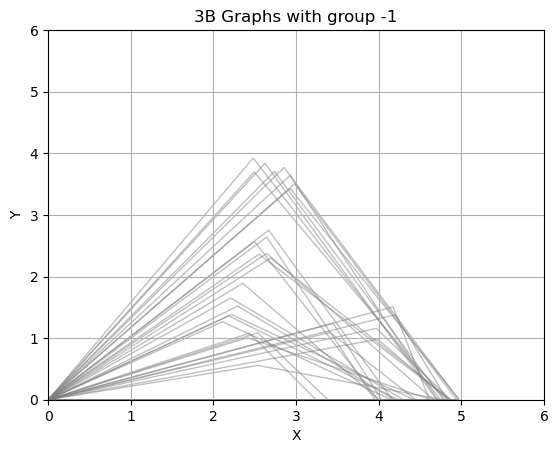

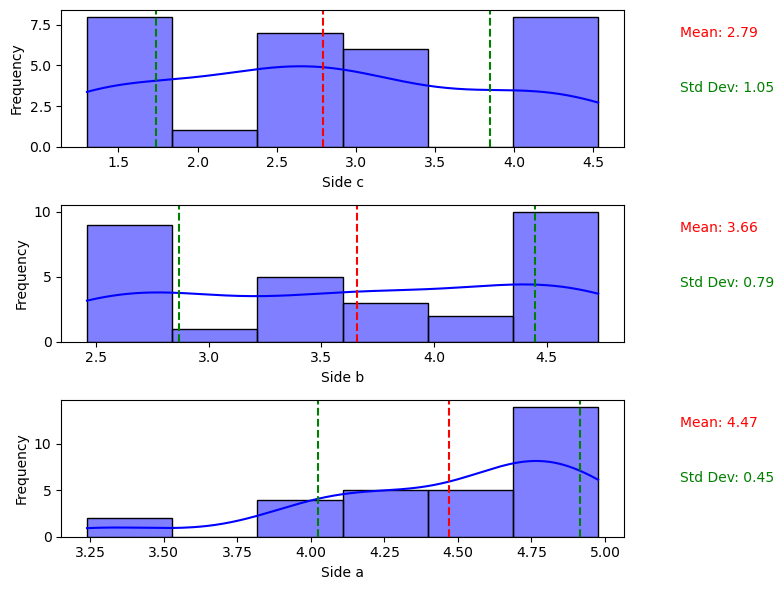

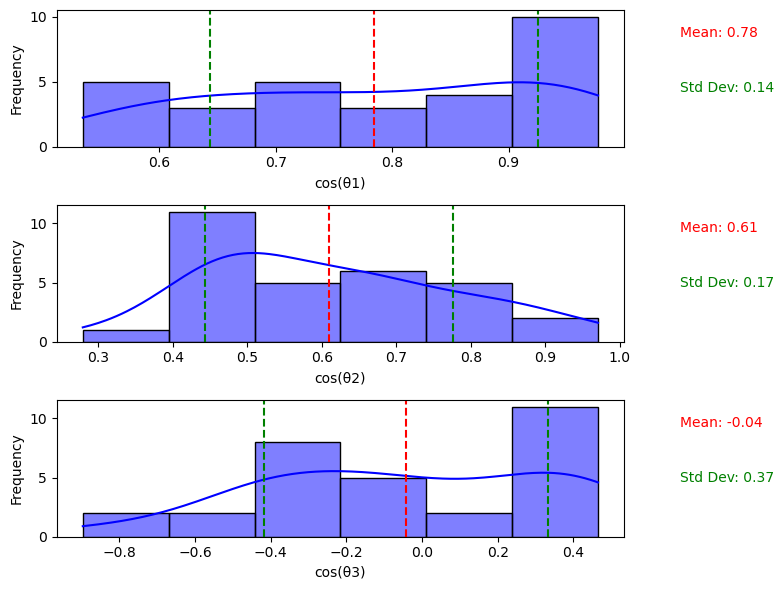

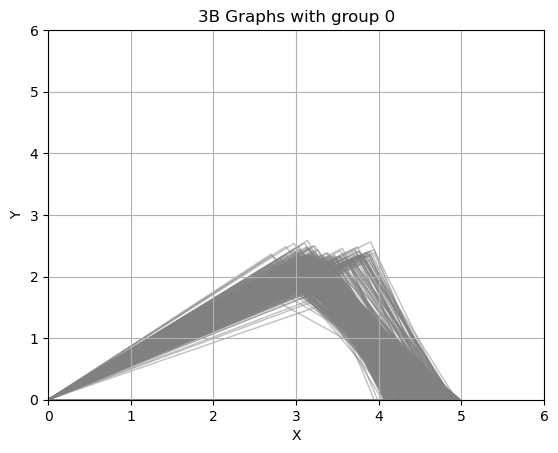

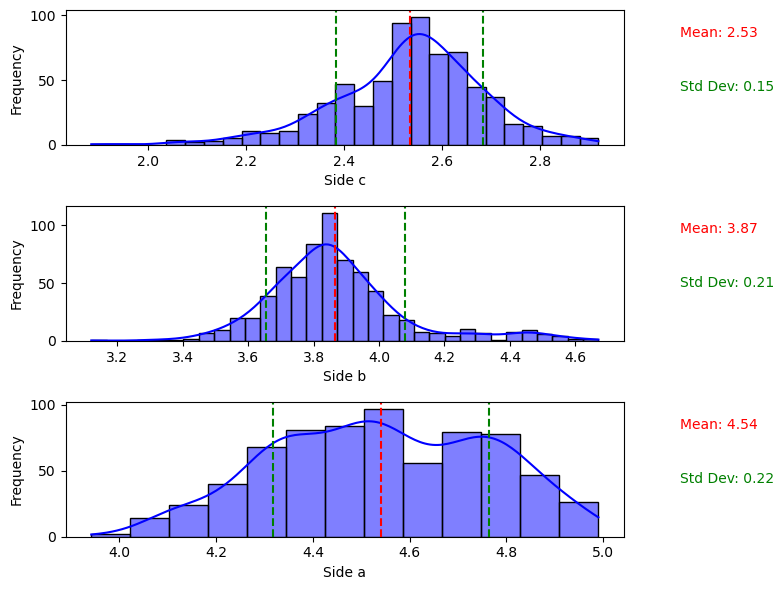

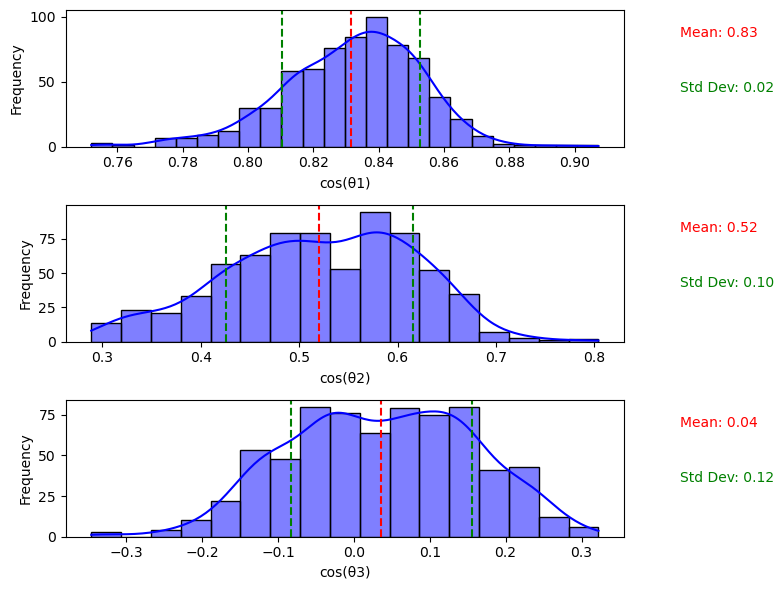

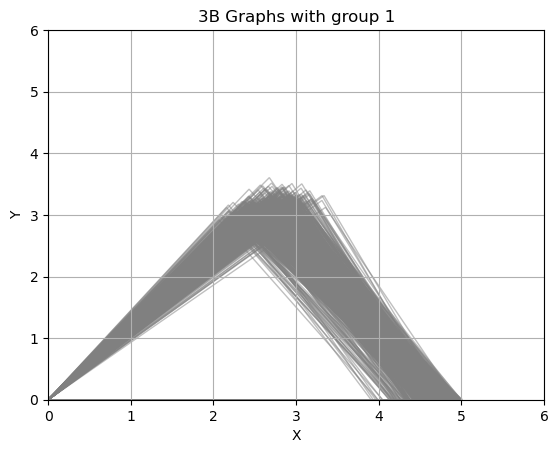

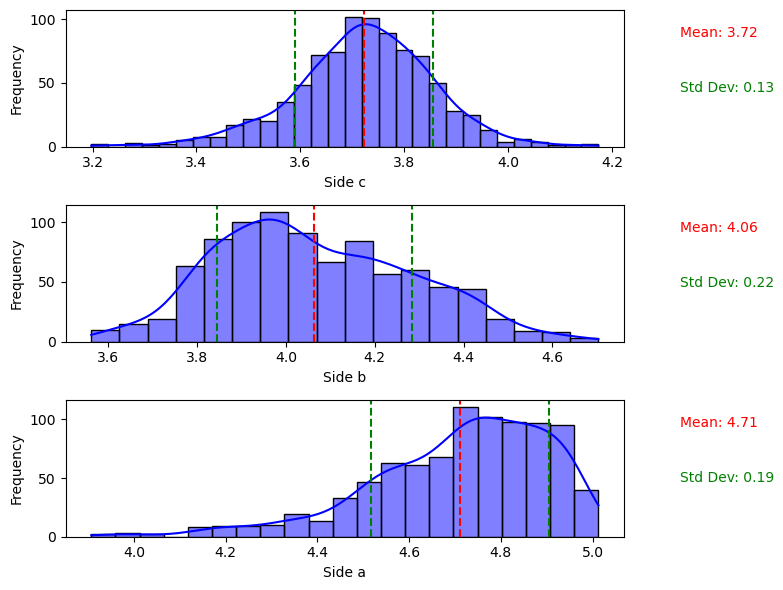

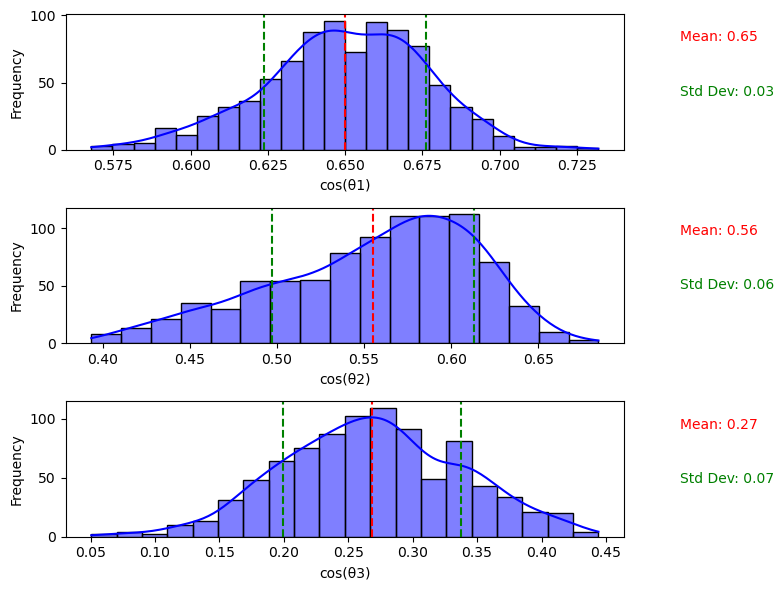

/var/folders/qt/6k9t6mfn12l30tsrj8hnl6wh0000gs/T/ipykernel_17808/1873996759.py:28: RuntimeWarning: invalid value encountered in sqrt
  C_y = float(np.sqrt(b**2 - C_x**2)) # square root


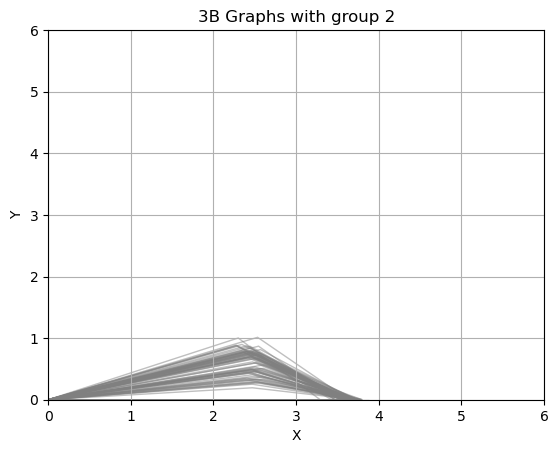

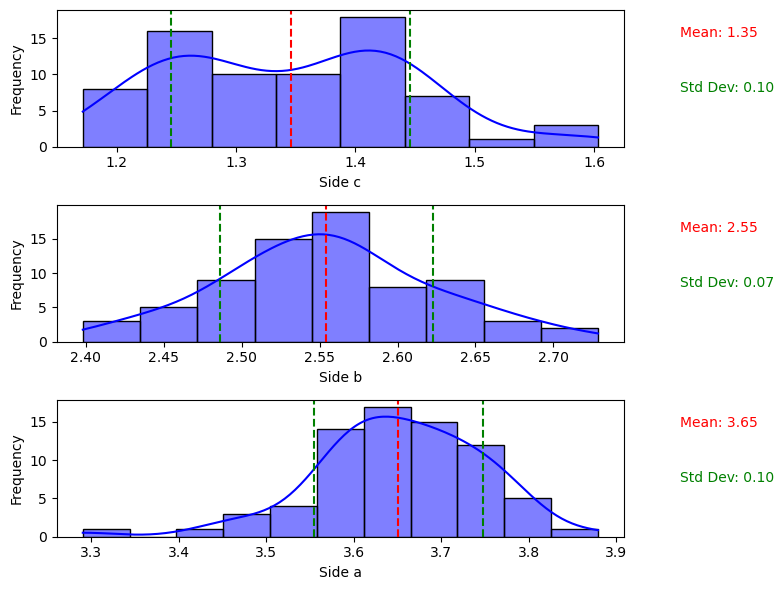

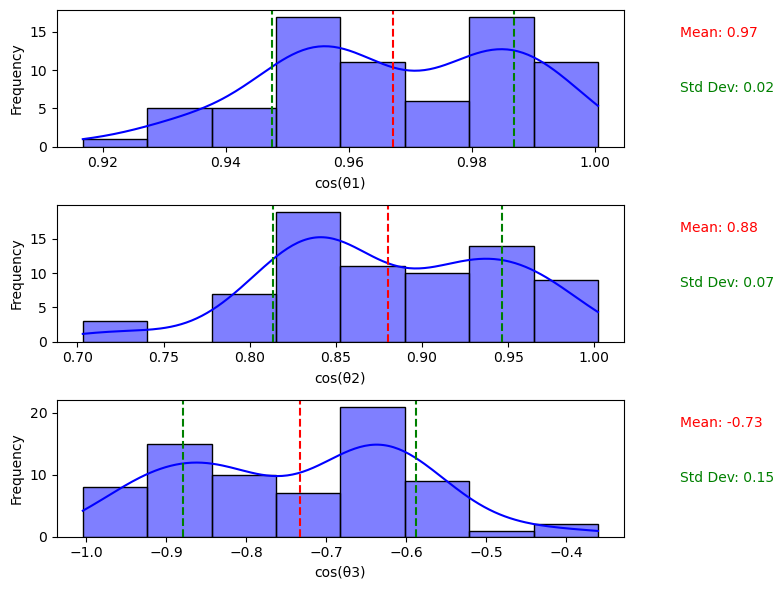

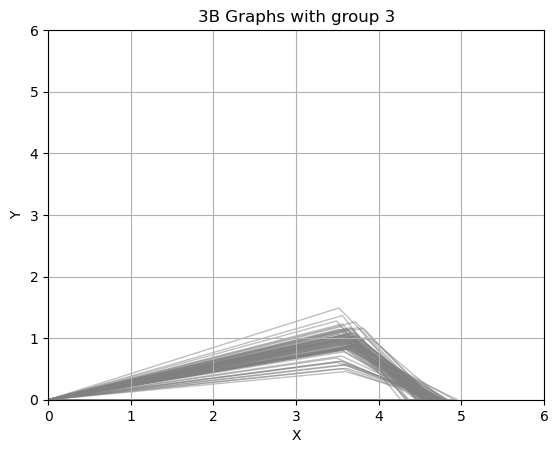

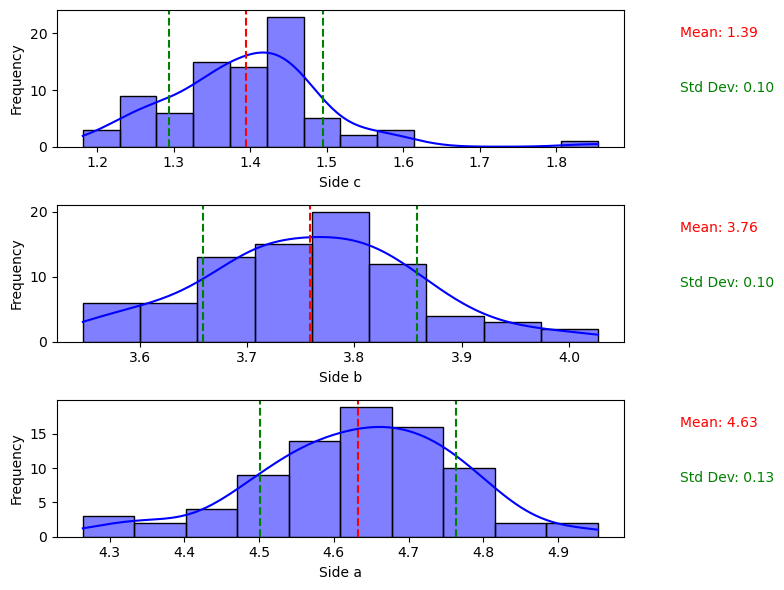

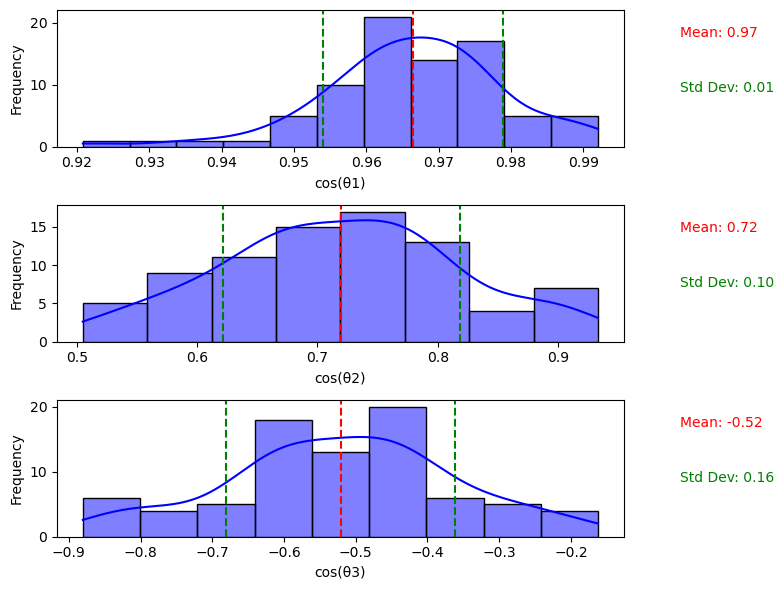

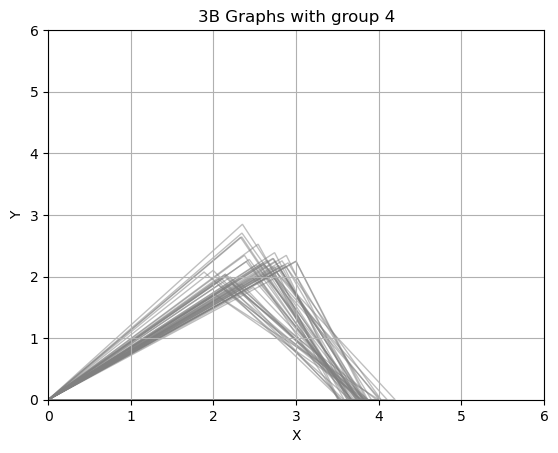

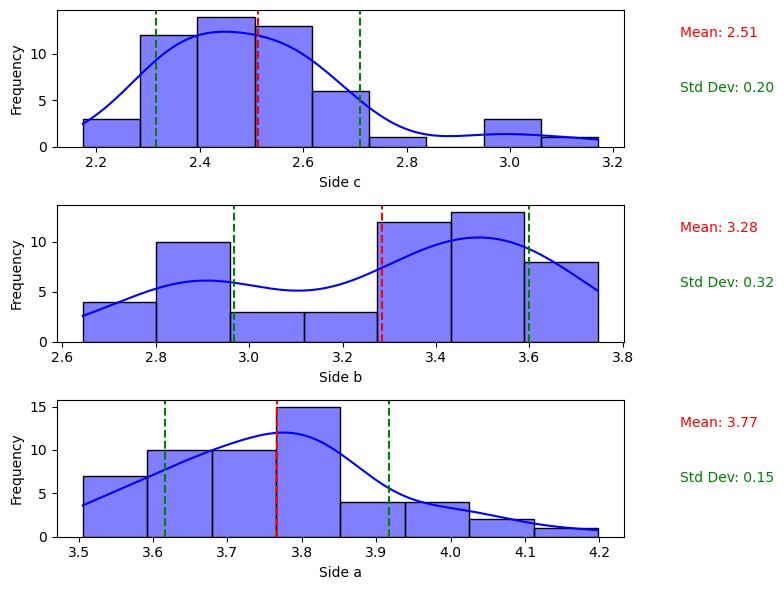

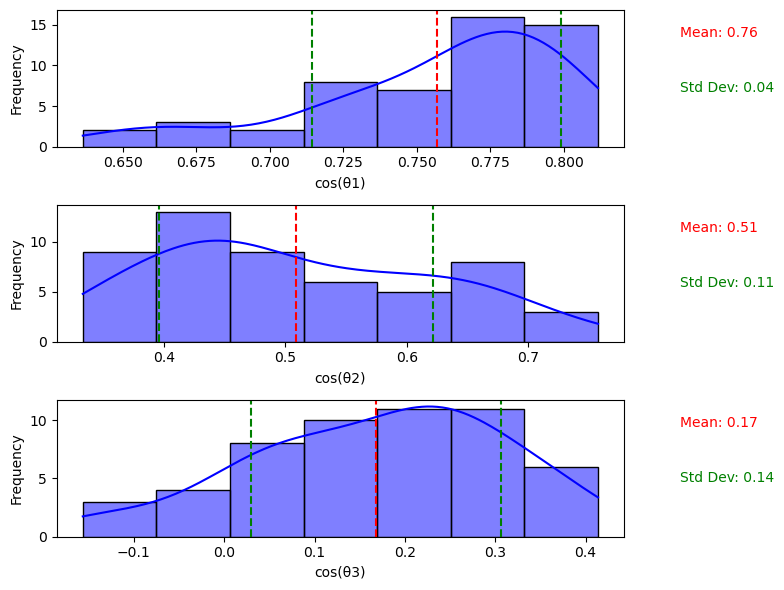

In [21]:
unique_labels = np.unique(labels)
for i, label in enumerate(unique_labels):
    a_side_lengths = []
    b_side_lengths = []
    c_side_lengths = []
    a_angle = []
    b_angle = []
    c_angle = []
    critical_points_x_label = critical_points_x[labels == label]
    critical_points_y_label = critical_points_y[labels == label]
    # Create a NumPy array of zeros with the desired shape
    array = np.zeros((len(critical_points_x_label), 2)) 
    array[:, 0] = critical_points_x_label
    array[:, 1] = critical_points_y_label
    inv_transformed_points = umap_model.inverse_transform(array)
    
    for row in inv_transformed_points:
        a, b, c = row
        a_side_lengths.append(a)
        b_side_lengths.append(b)
        c_side_lengths.append(c)
        angle1, angle2, angle3 = calculate_angle(a, b, c)
        a_angle.append(angle1)
        b_angle.append(angle2)
        c_angle.append(angle3)
    
    main(inv_transformed_points, a_side_lengths, b_side_lengths, c_side_lengths, a_angle, b_angle, c_angle, label)
